In [204]:
from aquire import new_titanic_data, new_iris_data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pydataset import data
import prepare
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [3]:
#1.a
df = data('iris')
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#1.b
df.shape

(150, 5)

In [5]:
#1.c
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
#1.d 
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
#1.e 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
#2 
df = pd.read_excel('Table1_CustDetails.xlsx', sheet_name='Table1_CustDetails')

In [9]:
#assign fist 100 rows to new data frame
df_new = df[:100]

In [10]:
# number of rown printed
df.shape[0]

7049

In [11]:
# first 5 column names
df.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
df.columns.where(df.dtypes == 'object').dropna()

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [13]:
df.columns.where(df.dtypes == 'float64').dropna()

Index(['monthly_charges', 'total_charges'], dtype='object')

In [14]:
df.select_dtypes(include='float64').max() - df.select_dtypes(include='float64').min()

monthly_charges     100.5
total_charges      8666.0
dtype: float64

In [15]:
df = pd.read_csv('train.csv')

In [16]:
# first 3 rows
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
#rows, cols
df.shape

(891, 12)

In [18]:
#column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
#data types for each colmn
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
#5 unique values for each catagorical colmn
#df_obj_only = df.select_dtypes(include='object')
#for i in df_obj_only.columns:
     #print(df_obj_only[i].unique())

    

In [21]:
new_iris_data()[:5]

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [22]:
new_titanic_data()[3:5]

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
3,3,3,1,1,female,35.0,1,0,53.10,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.05,S,Third,NaN,Southampton,1


In [23]:
df = new_titanic_data()

In [24]:
df.columns.where(df.dtypes == 'object').dropna()

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [25]:
df.columns.where(df.dtypes != 'object').dropna()

Index(['Unnamed: 0', 'passenger_id', 'survived', 'pclass', 'age', 'sibsp',
       'parch', 'fare', 'alone'],
      dtype='object')

In [26]:
#PREPARE STEPS

In [27]:
iris_df = new_iris_data()

In [28]:
iris_df[:5]

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [29]:
iris_df.describe()

,Unnamed: 0,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,2.000000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.819232,0.828066,0.435866,1.765298,0.762238
min,0.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,1.000000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,2.000000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,3.000000,6.400000,3.300000,5.100000,1.800000
max,149.000000,3.000000,7.900000,4.400000,6.900000,2.500000


In [30]:
iris_df.shape

(150, 7)

In [31]:
#drops any duplicates so every row is unique
iris_df = iris_df.drop_duplicates()

In [32]:
iris_df.shape

(150, 7)

In [33]:
cols_to_drop = ['Unnamed: 0','species_id']

In [34]:
iris_df = iris_df.drop(columns=cols_to_drop)

In [35]:
iris_df = iris_df.rename(columns={'species_name':'species'})

In [36]:
dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False)

In [37]:
iris_df = pd.concat([iris_df,dummy_df], axis=1)

In [38]:
#put into helper funtion
new_df = new_iris_data()

In [39]:
new_df[:5]

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [40]:
new_df = prepare.prep_iris(new_df)

In [41]:
new_df[:5]

,species,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [42]:
###EXPLORATION ANALYSIS

In [43]:
##aquire and prepare data 

In [2]:
iris_df = new_iris_data()

In [3]:
iris_df.head()

,Unnamed: 0,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,5.1,3.5,1.4,0.2
1,1,1,setosa,4.9,3.0,1.4,0.2
2,2,1,setosa,4.7,3.2,1.3,0.2
3,3,1,setosa,4.6,3.1,1.5,0.2
4,4,1,setosa,5.0,3.6,1.4,0.2


In [4]:
iris_df = prepare.prep_iris(iris_df)

In [5]:
iris_df[:5]

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [6]:
#create our train, validate , and test dataframes
train, validate, test = prepare.train_validate_test_split(iris_df, target = 'species')

In [15]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [18]:
##start exploring univariate stats

In [32]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species_versicolor,150.0,0.333333,0.472984,0.0,0.0,0.00,1.0,1.0
species_virginica,150.0,0.333333,0.472984,0.0,0.0,0.00,1.0,1.0


In [47]:
#histograms

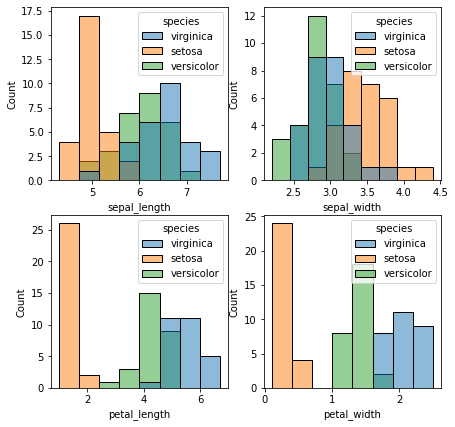

In [93]:
fig, axs= plt.subplots(2,2, figsize=(7,7))
sns.histplot(data=train, x ='sepal_length', ax=axs[0,0],hue='species')
sns.histplot(data=train, x ='sepal_width' , ax=axs[0,1],hue='species')
sns.histplot(data=train, x ='petal_length', ax=axs[1,0],hue='species')
sns.histplot(data=train, x ='petal_width' , ax=axs[1,1],hue='species')
plt.show()

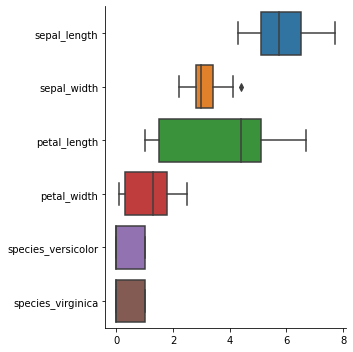

In [111]:
#box plot
sns.catplot(data=train, orient='h', kind='box')

In [ ]:
#descriptive stats

In [147]:
#frequeny tables

In [156]:
pd.crosstab(train.species, train.sepal_width,margins=True, normalize= True).T


species,setosa,versicolor,virginica,All
sepal_width,,,,
2.2,0.000000,0.023810,0.000000,0.023810
2.4,0.000000,0.011905,0.000000,0.011905
2.5,0.000000,0.023810,0.047619,0.071429
2.6,0.000000,0.023810,0.000000,0.023810
2.7,0.000000,0.023810,0.035714,0.059524
2.8,0.000000,0.047619,0.047619,0.095238
2.9,0.011905,0.071429,0.023810,0.107143
3.0,0.023810,0.059524,0.083333,0.166667
3.1,0.023810,0.023810,0.023810,0.071429


In [158]:
pd.crosstab(train.species, train.sepal_length,margins=True, normalize= True).T

species,setosa,versicolor,virginica,All
sepal_length,,,,
4.3,0.011905,0.000000,0.000000,0.011905
4.4,0.011905,0.000000,0.000000,0.011905
4.6,0.023810,0.000000,0.000000,0.023810
4.8,0.047619,0.000000,0.000000,0.047619
4.9,0.011905,0.011905,0.011905,0.035714
5.0,0.071429,0.000000,0.000000,0.071429
5.1,0.071429,0.011905,0.000000,0.083333
5.2,0.023810,0.011905,0.000000,0.035714
5.3,0.011905,0.000000,0.000000,0.011905


In [160]:
pd.crosstab(train.species, train.petal_length, margins=True, normalize= True).T

species,setosa,versicolor,virginica,All
petal_length,,,,
1.0,0.011905,0.000000,0.000000,0.011905
1.1,0.011905,0.000000,0.000000,0.011905
1.2,0.011905,0.000000,0.000000,0.011905
1.3,0.023810,0.000000,0.000000,0.023810
1.4,0.083333,0.000000,0.000000,0.083333
1.5,0.119048,0.000000,0.000000,0.119048
1.6,0.035714,0.000000,0.000000,0.035714
1.7,0.011905,0.000000,0.000000,0.011905
1.9,0.023810,0.000000,0.000000,0.023810


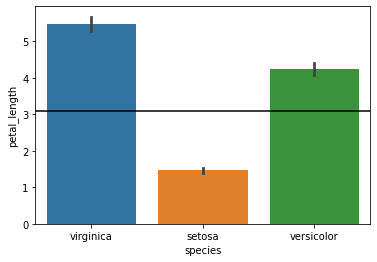

In [146]:
sns.barplot(x = 'species' , y = train.petal_length , data = train)
plt.axhline(y = train.sepal_width.mean(), color = 'black')

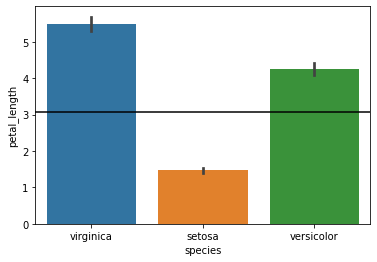

In [143]:
sns.barplot(x = 'species' , y = train.petal_length , data = train)
plt.axhline(y = train.sepal_width.mean(), color = 'black')

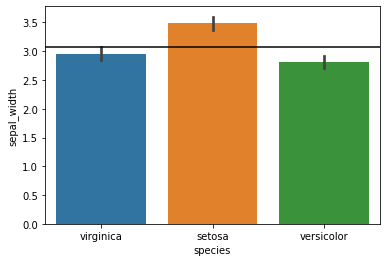

In [145]:
sns.barplot(x = 'species' , y = train.sepal_width , data = train)
plt.axhline(y = train.sepal_width.mean(), color = 'black')

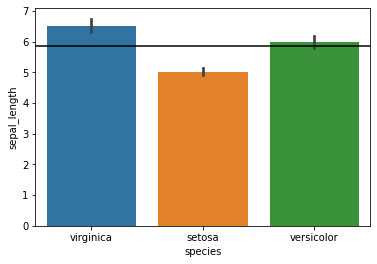

In [144]:
sns.barplot(x = 'species' , y = train.sepal_length , data = train)
plt.axhline(y = train.sepal_length.mean(), color = 'black')

<AxesSubplot:title={'center':'petal_width for each species'}, xlabel='petal_width'>

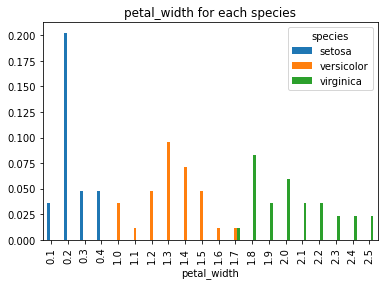

In [186]:
pd.crosstab(train.petal_width, train.species , normalize= True).plot.bar(title = 'petal_width for each species')

<AxesSubplot:title={'center':'petal_length for each species'}, xlabel='petal_length'>

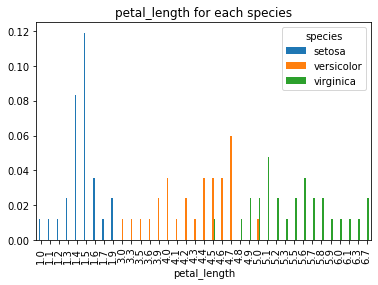

In [189]:
pd.crosstab(train.petal_length, train.species , normalize= True).plot.bar(title = 'petal_length for each species')

<AxesSubplot:title={'center':'sepal_length for each species'}, xlabel='sepal_length'>

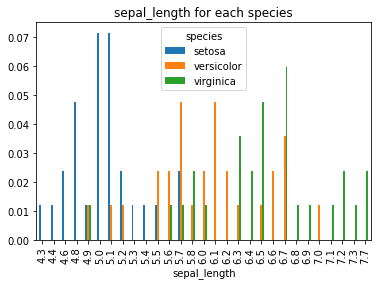

In [190]:
pd.crosstab(train.sepal_length, train.species , normalize= True).plot.bar(title = 'sepal_length for each species')

<AxesSubplot:title={'center':'sepal_width for each species'}, xlabel='sepal_width'>

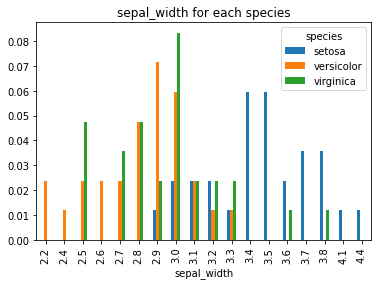

In [191]:
pd.crosstab(train.sepal_width, train.species , normalize= True).plot.bar(title = 'sepal_width for each species')

In [197]:
train[train['species'] == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,5.021429,3.482143,1.464286,0.232143,0.0,0.0
std,0.330384,0.334502,0.192862,0.086297,0.0,0.0
min,4.300000,2.900000,1.000000,0.100000,0.0,0.0
25%,4.800000,3.275000,1.400000,0.200000,0.0,0.0
50%,5.000000,3.500000,1.500000,0.200000,0.0,0.0
75%,5.125000,3.700000,1.500000,0.300000,0.0,0.0
max,5.700000,4.400000,1.900000,0.400000,0.0,0.0


In [198]:
train[train['species'] == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,6.532143,2.953571,5.489286,2.046429,0.0,1.0
std,0.628374,0.314445,0.549302,0.234887,0.0,0.0
min,4.900000,2.500000,4.500000,1.700000,0.0,1.0
25%,6.300000,2.775000,5.100000,1.800000,0.0,1.0
50%,6.500000,3.000000,5.500000,2.000000,0.0,1.0
75%,6.825000,3.100000,5.800000,2.200000,0.0,1.0
max,7.700000,3.800000,6.700000,2.500000,0.0,1.0


In [203]:
train[train['species'] == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,5.996429,2.810714,4.250000,1.321429,1.0,0.0
std,0.528087,0.272627,0.475706,0.172899,0.0,0.0
min,4.900000,2.200000,3.000000,1.000000,1.0,0.0
25%,5.675000,2.675000,4.000000,1.200000,1.0,0.0
50%,6.050000,2.900000,4.400000,1.300000,1.0,0.0
75%,6.350000,3.000000,4.600000,1.400000,1.0,0.0
max,7.000000,3.300000,5.000000,1.700000,1.0,0.0


In [221]:
x = train[train['species']== 'versicolor'].petal_width
y = train[train['species']== 'virginica'].petal_width

In [222]:
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=0.5, pvalue=6.249742324511654e-11)

In [223]:
x = train[train['species']== 'versicolor'].petal_length
y = train[train['species']== 'virginica'].petal_length

In [224]:
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=14.5, pvalue=3.104550049946059e-10)

In [226]:
x = train[train['species']== 'versicolor'].sepal_length
y = train[train['species']== 'virginica'].sepal_length
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=193.5, pvalue=0.000569624113316977)

In [228]:
x = train[train['species']== 'versicolor'].sepal_width
y = train[train['species']== 'virginica'].sepal_width
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=303.5, pvalue=0.07279909603833885)

In [229]:
#multivariate stats

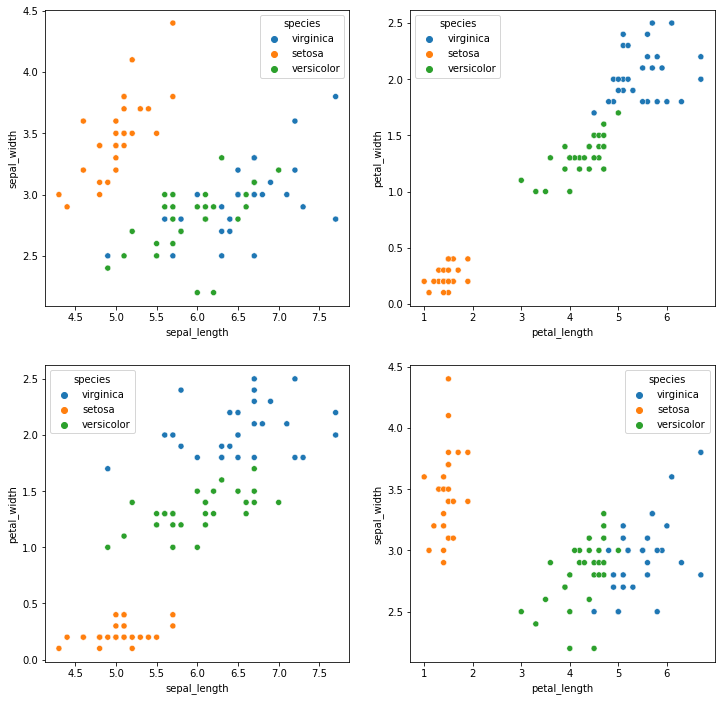

In [245]:
fig, axs= plt.subplots(2,2, figsize=(12,12))
sns.scatterplot(data=train, x = 'sepal_length' , y = 'sepal_width', hue='species' , ax=axs[0][0])
sns.scatterplot(data=train, x = 'petal_length' , y = 'petal_width', hue='species' , ax=axs[0][1])
sns.scatterplot(data=train, x = 'sepal_length' , y = 'petal_width', hue='species' , ax=axs[1][0])
sns.scatterplot(data=train, x = 'petal_length' , y = 'sepal_width', hue='species' , ax=axs[1][1])
plt.show()

In [256]:
train_melt = pd.melt(train, id_vars = ['species'], var_name='class', value_name='measure')

In [257]:
train_melt

,species,class,measure
0,virginica,sepal_length,6.3
1,virginica,sepal_length,6.3
2,setosa,sepal_length,5.3
3,setosa,sepal_length,4.3
4,virginica,sepal_length,6.4
...,...,...,...
499,setosa,species_virginica,0.0
500,versicolor,species_virginica,0.0
501,virginica,species_virginica,1.0
502,virginica,species_virginica,1.0


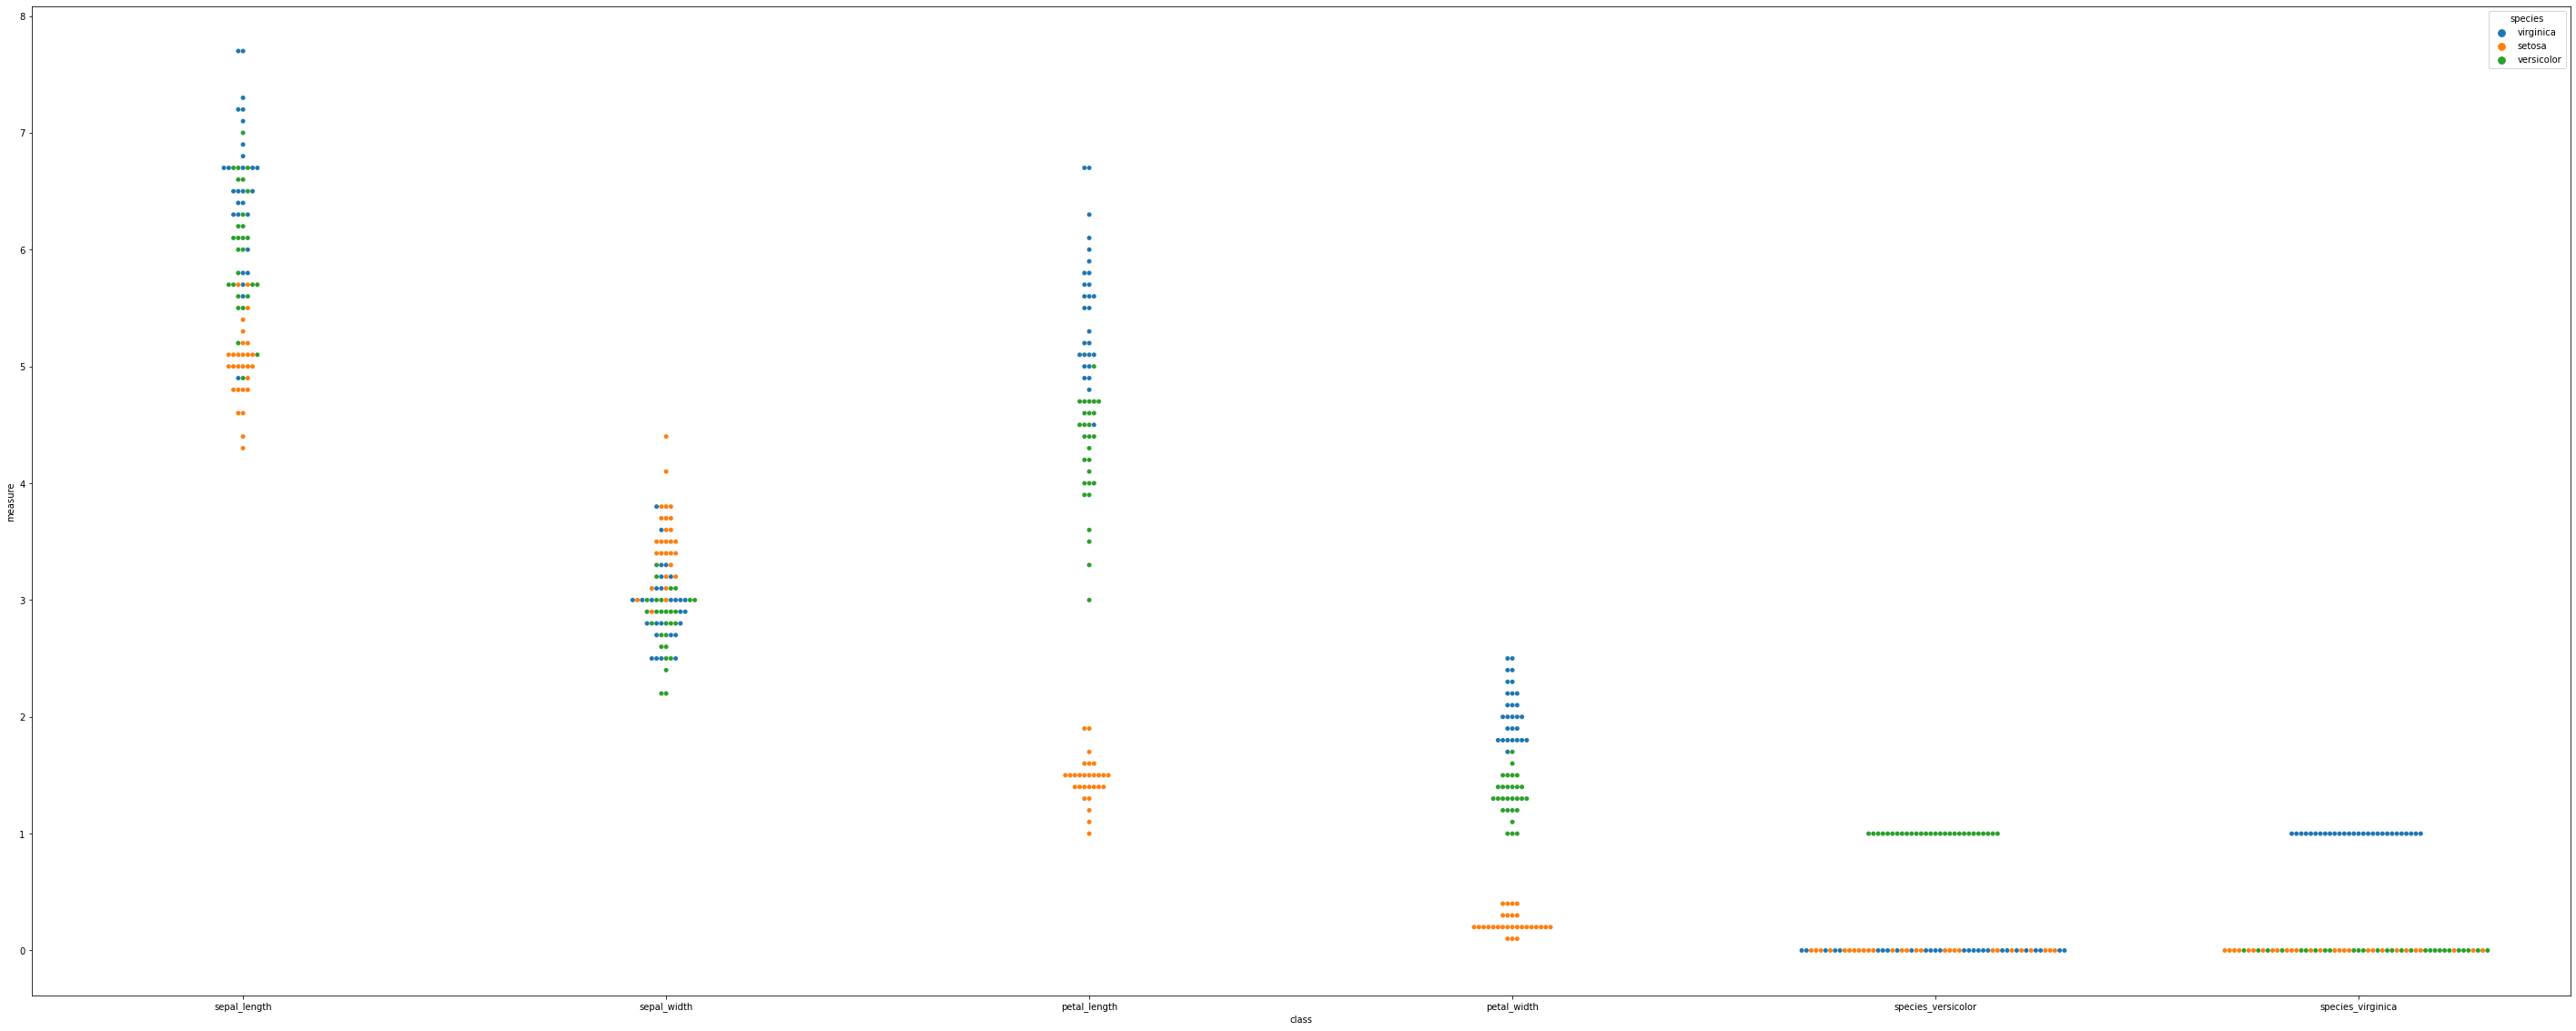

In [269]:
plt.figure(figsize = (50,20))
sns.swarmplot(data = train_melt, x = 'class', y = 'measure', hue = 'species')
plt.show()

In [270]:
#sepal length and width are floating in the same ball park of legnt, key diffrences measure is strongly correlated to petal meassure